In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

C:\Users\shree\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shree\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shree\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shree\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


(50000, 32, 32, 3)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

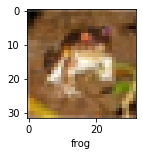

In [11]:
plot_sample(X_train, y_train, 0)

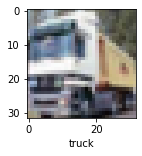

In [12]:
plot_sample(X_train, y_train, 1)

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
50000/50000 [==============================] - 108s 2ms/sample - loss: 1.8631 - acc: 0.3332
Epoch 2/5
50000/50000 [==============================] - 106s 2ms/sample - loss: 1.6598 - acc: 0.4121
Epoch 3/5
50000/50000 [==============================] - 106s 2ms/sample - loss: 1.5714 - acc: 0.4430
Epoch 4/5
50000/50000 [==============================] - 109s 2ms/sample - loss: 1.5085 - acc: 0.4662
Epoch 5/5
50000/50000 [==============================] - 109s 2ms/sample - loss: 1.4576 - acc: 0.4831


In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.53      0.53      1000
           1       0.40      0.78      0.53      1000
           2       0.47      0.15      0.23      1000
           3       0.31      0.41      0.36      1000
           4       0.56      0.21      0.31      1000
           5       0.53      0.20      0.30      1000
           6       0.38      0.70      0.50      1000
           7       0.75      0.30      0.43      1000
           8       0.70      0.45      0.55      1000
           9       0.36      0.65      0.47      1000

    accuracy                           0.44     10000
   macro avg       0.50      0.44      0.42     10000
weighted avg       0.50      0.44      0.42     10000



In [18]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 39s 781us/sample - loss: 1.4720 - acc: 0.4733
Epoch 2/10
50000/50000 [==============================] - 39s 779us/sample - loss: 1.1038 - acc: 0.6148
Epoch 3/10
50000/50000 [==============================] - 39s 783us/sample - loss: 0.9762 - acc: 0.6619
Epoch 4/10
50000/50000 [==============================] - 40s 796us/sample - loss: 0.8972 - acc: 0.6894
Epoch 5/10
50000/50000 [==============================] - 43s 857us/sample - loss: 0.8382 - acc: 0.7083
Epoch 6/10
50000/50000 [==============================] - 43s 864us/sample - loss: 0.7842 - acc: 0.7300
Epoch 7/10
50000/50000 [==============================] - 43s 867us/sample - loss: 0.7346 - acc: 0.7458
Epoch 8/10
50000/50000 [==============================] - 43s 869us/sample - loss: 0.6959 - acc: 0.7580
Epoch 9/10
50000/50000 [==============================] - 43s 866us/sample - loss: 0.6588 - acc: 0.7702
Epoch 10/10
50000/50000 [==============================] - 43s 8

In [21]:
cnn.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 295us/sample - loss: 0.9368 - acc: 0.6952


[0.9368146001815796, 0.6952]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.09049555e-03, 3.48919166e-05, 8.74626974e-04, 9.41929996e-01,
        1.26819499e-03, 4.36940789e-02, 3.54198762e-03, 6.02883374e-05,
        6.32473500e-03, 1.80831135e-04],
       [1.29503652e-01, 1.00643799e-01, 2.07844772e-03, 1.32831687e-04,
        3.68614856e-05, 1.32874075e-05, 1.22886549e-05, 2.87841135e-06,
        7.64768124e-01, 2.80790403e-03],
       [7.13900030e-02, 3.41726184e-01, 3.38024856e-03, 1.44217061e-02,
        1.63000450e-02, 1.18116639e-03, 2.65440508e-03, 4.99167386e-03,
        4.98299867e-01, 4.56547104e-02],
       [8.97665501e-01, 3.16868280e-03, 3.73820290e-02, 4.92512598e-04,
        4.43085097e-03, 6.03133194e-05, 5.43291935e-05, 6.40414481e-04,
        5.60997464e-02, 5.55946917e-06],
       [4.70581796e-07, 3.68874571e-05, 3.34197059e-02, 4.26896513e-02,
        6.18390083e-01, 1.01351468e-02, 2.95299798e-01, 5.62235414e-07,
        2.74923623e-05, 1.24179820e-07]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6])

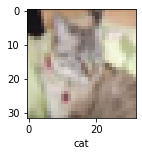

In [31]:
plot_sample(X_test, y_test,8)

In [32]:
classes[y_classes[8]]

'cat'

In [33]:
classes[y_classes[8]]

'cat'